In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def Casos(arq,semana):
    """Lê o arquivo do ano com informação dos casos epidêmicos e semana de ocorrência. Retorna um Dataframe com as informações de ocorrêcias por bairro."""
    tabela_oficial=pd.read_csv('https://raw.githubusercontent.com/AntonioMarcossj/Aedis-Networks/Dengue/Dados%20de%20Recife/Tabela_de_Bairros.csv' ,sep=',',parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)
    T=pd.read_csv(arq, parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)
    L=T[T['semana']==semana]
    bairro=list(L['bairro'])
    #data=dict([(i, bairro.count(i)) for i in tabela_oficial['bairro']])
    #Funciona da mesma forma que:
    data={}
    for i in tabela_oficial['bairro'].map(lambda x: x.strip()):
        data[i]=[bairro.count(i)]
    return pd.DataFrame(data)  

def correlation_matrix(arq,t0,t1,e=2,absolute=True):
    """Recebe informações de ano(s), semana inicial e final, valor de Euler (por padrão igual a 2) e método (por padrão, absoluto). Se absolute=False, considera-se apenas valores de correlação maior que 0, se 'original', retorna-se as correlações positivas, nulas e negativas."""
    C=Casos(arq,t0)
    for i in range(t0,t1):
        C.loc[i]=Casos(arq,i+1).loc[0]
    if absolute=='original':
        matrix=np.array(C.corr().fillna(0))
        filter_matrix=[[0 if matrix[i,j]<1-e else matrix[i,j] for i in range(0,94)] for j in range(0,94)] 
    else:
        if absolute==True:
            matrix=np.absolute(np.array(C.corr().fillna(0)))
            filter_matrix=[[0 if matrix[i,j]<1-e else matrix[i,j] for i in range(0,94)] for j in range(0,94)]
        else:
            matrix=np.array(C.corr().fillna(0))
            M=np.array([[0 if matrix[i,j]<0 else matrix[i,j] for i in range(0,94)] for j in range(0,94)])
            filter_matrix=[[0 if M[i,j]<1-e else M[i,j] for i in range(0,94)] for j in range(0,94)]
  
    return pd.DataFrame(filter_matrix)

In [ ]:
tb=pd.read_csv('https://raw.githubusercontent.com/AntonioMarcossj/Aedis-Networks/Dengue/Dados%20de%20Recife/Tabela_de_Bairros.csv' ,sep=',',parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)

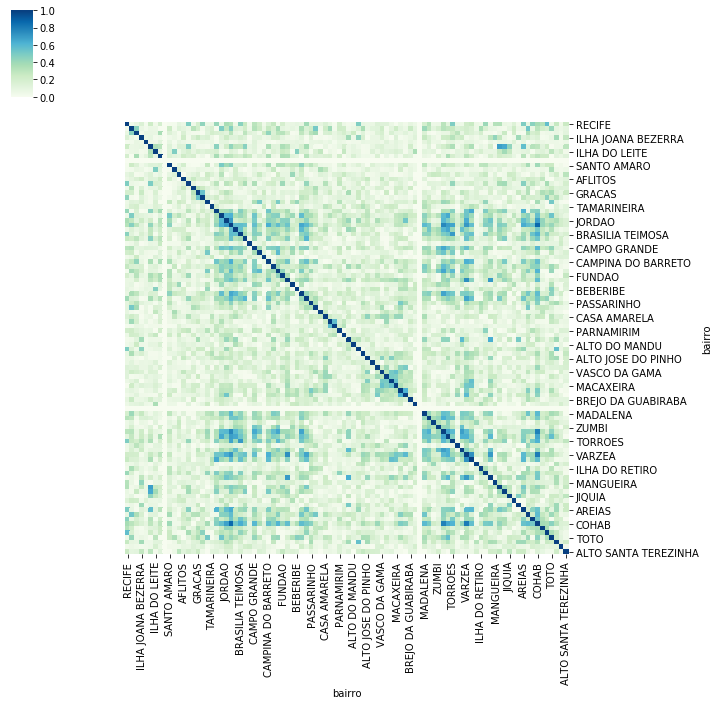

<Figure size 432x288 with 0 Axes>

In [33]:
CorrMat = np.array(correlation_matrix('https://raw.githubusercontent.com/AntonioMarcossj/Aedis-Networks/Tabalas-oficiais/2013.csv', 1, 52, 1))
df=pd.DataFrame(CorrMat, index = tb['bairro'], columns = tb['bairro'])
sns.clustermap(df, cmap='GnBu', vmax=1.0, vmin=0 , linewidths=0, col_cluster=False, row_cluster=False)
plt.show()
plt.savefig('Nome.png')

In [31]:
for i in range(0,201):
    CorrMat = np.array(correlation_matrix('https://raw.githubusercontent.com/AntonioMarcossj/Aedis-Networks/Tabalas-oficiais/2013.csv', 1, 52, i/200))
    df=pd.DataFrame(CorrMat, index = tb['bairro'], columns = tb['bairro'])
    sns.clustermap(df, cmap='GnBu', vmax=1.0, vmin=0 , linewidths=0, col_cluster=False, row_cluster=False)
    plt.show()

1
2
3
4
5
6
7
8
9
